### _Mini Capstone Project: Crime Data Analysis with MySQL and Python<br> by A.Raishabanu(S7986)_

## __2. Database Connection__ :

### __2.1 PyMySQL to establish a connection to the database__

In [1]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [37]:
import os
print(os.getcwd())

C:\Users\ADMIN


In [2]:
import pymysql
conn=pymysql.connect(
    host='localhost',
    user='root',
    password='banu',
    db='crimedb')


### __Verify Successfull Connection by printing Object__

In [3]:
print(conn)

### __Import mandatory Packages__

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

### __Verify the successful import of data__

In [5]:
crime=pd.read_sql('select * from crime',conn)
print(crime)                  

         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
494  200106614  02-07-2020  02-07-2020      Central     624   
495  200106615  02-07-2020  02-07-2020      Central     624   
496  200106616  02-07-2020  02-07-2020      Central     624   
497  200106617  02-07-2020  01-10-2020      Central     510   
498  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2           

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9808\551032289.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crime=pd.read_sql('select * from crime',conn)


## __3. Data Exploration:__

### __3.1 Type of data in current format__

In [6]:
type(crime)

pandas.core.frame.DataFrame

### _Currently the imported data from mysql database is in pandas dataframe_

### __3.2 Checking the head and tail of data frame to check the structure of the data__

In [7]:
crime.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [8]:
crime.tail()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25
498,200106618,02-07-2020,02-03-2020,Central,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),72,M,"VEHICLE, PASSENGER/TRUCK",IC,2600 S FIGUEROA ST,34.05,-118.24


### _My infer from the above structure the data is in ascending order based DR_NO. <br> DR_NO(Division of record number) is considered as primary key_

### __3.3 Total no of records(rows)__

In [9]:
total_no_rows=crime.shape[0]
print(f"Total number of rows in crime dataframe is {total_no_rows}")

Total number of rows in crime dataframe is 499


### __3.4 Total no of Columns__

In [10]:
total_no_columns=crime.shape[1]
print(f"Total number of columns in crime dataframe is {total_no_columns}")

Total number of columns in crime dataframe is 13


### __3.5 Information about the data set__

In [11]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


###  _From above information we get no of rows,columns,column name,datatype of each column,<br> Its very important to look that every column is considered as not to have null values._

### __3.6 Checking null values in dataframe__

In [12]:
null_values=crime.isnull().sum()
print(null_values)

DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64


In [13]:
crime.replace('', np.nan, inplace=True)

In [14]:
null_values=crime.isnull().sum()
print(null_values)

DR_NO           0
Date_Rptd       0
DATE_OCC        0
AREA_NAME       0
Crm_Cd          0
Crm_Cd_Desc     0
Vict_Age        0
Vict_Sex       27
Premis_Desc     0
Status          0
Location        0
LAT             0
LON             0
dtype: int64


In [15]:
crime['Vict_Sex'].fillna('X', inplace=True)

In [16]:
null_values=crime.isnull().sum()
print(null_values)

DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64


### _It infers there is no null values in the dataframe_

### __3.7 Describing data for statistical analysis__ 

In [17]:
crime.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DR_NO,499.0,NaN,NaN,NaN,199993017.697395,8742243.166764,10304468.0,200104383.5,200104775.0,200106417.0,222013040.0
Date_Rptd,499,68,01-11-2020,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DATE_OCC,499,61,01-11-2020,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AREA_NAME,499,19,Central,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crm_Cd,499.0,NaN,NaN,NaN,504.178357,198.381863,210.0,330.0,442.0,624.0,956.0
Crm_Cd_Desc,499,42,BURGLARY FROM VEHICLE,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vict_Age,499.0,NaN,NaN,NaN,32.142285,20.202136,0.0,23.0,31.0,46.5,78.0
Vict_Sex,499,3,M,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Premis_Desc,499,67,STREET,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,499,4,IC,447,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### __3.8 Size, as the name suggests, returns the size of a dataframe<br>which is the number of rows multiplied by the number of columns.__

In [18]:
crime.size

6487

### __3.9 no of unique values in each column__

In [19]:
crime.nunique()

DR_NO          499
Date_Rptd       68
DATE_OCC        61
AREA_NAME       19
Crm_Cd          42
Crm_Cd_Desc     42
Vict_Age        66
Vict_Sex         3
Premis_Desc     67
Status           4
Location       365
LAT             35
LON             29
dtype: int64

### _From the above inference DR_NO is having full unique values, That is considered as primary key._

### __3.10 Distinct crime codes and their descriptions__

In [20]:
cr_values=crime[['Crm_Cd','Crm_Cd_Desc']].drop_duplicates()
cr_sort=cr_values.sort_values(by='Crm_Cd')
print(cr_sort)

     Crm_Cd                                        Crm_Cd_Desc
42      210                                            ROBBERY
174     220                                  ATTEMPTED ROBBERY
14      230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
22      310                                           BURGLARY
249     320                                BURGLARY, ATTEMPTED
7       330                              BURGLARY FROM VEHICLE
6       341  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
466     343           SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
19      350                                      THEFT, PERSON
312     351                                    PURSE SNATCHING
12      354                                  THEFT OF IDENTITY
75      420    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
117     421                 THEFT FROM MOTOR VEHICLE - ATTEMPT
29      440                 THEFT PLAIN - PETTY ($950 & UNDER)
4       442           SHOPLIFTING - PETTY THEFT ($950 &

## __4. Temporal Analysis__

### __Temporal Analysis: Temporal analysis involves examining how crime rates vary over time.<br>Analysts may analyze trends on a daily, weekly, monthly, or yearly basis to identify seasonal patterns,recurring events, or spikes in criminal activities.__


In [21]:
crime.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'AREA_NAME', 'Crm_Cd', 'Crm_Cd_Desc',
       'Vict_Age', 'Vict_Sex', 'Premis_Desc', 'Status', 'Location', 'LAT',
       'LON'],
      dtype='object')

### __4.1 No of days between crime occured and crime reported__

In [22]:

df=crime.loc[:,['DATE_OCC','Date_Rptd']]
#print(df.head())
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'])
df['Date_Rptd'] = pd.to_datetime(df['Date_Rptd'])
df['Difference_In_Days'] = (df['Date_Rptd'] - df['DATE_OCC']).dt.days
df["Month_occured"]=df['DATE_OCC'].dt.month
df["Month_Reported"]=df['Date_Rptd'].dt.month

# Display the DataFrame with the calculated difference
print(df)

      DATE_OCC  Date_Rptd  Difference_In_Days  Month_occured  Month_Reported
0   2020-01-08 2020-01-08                   0              1               1
1   2020-01-01 2020-01-02                   1              1               1
2   2020-01-01 2020-01-01                   0              1               1
3   2020-01-01 2020-01-01                   0              1               1
4   2020-01-02 2020-01-02                   0              1               1
..         ...        ...                 ...            ...             ...
494 2020-02-07 2020-02-07                   0              2               2
495 2020-02-07 2020-02-07                   0              2               2
496 2020-02-07 2020-02-07                   0              2               2
497 2020-01-10 2020-02-07                  28              1               2
498 2020-02-03 2020-02-07                   4              2               2

[499 rows x 5 columns]


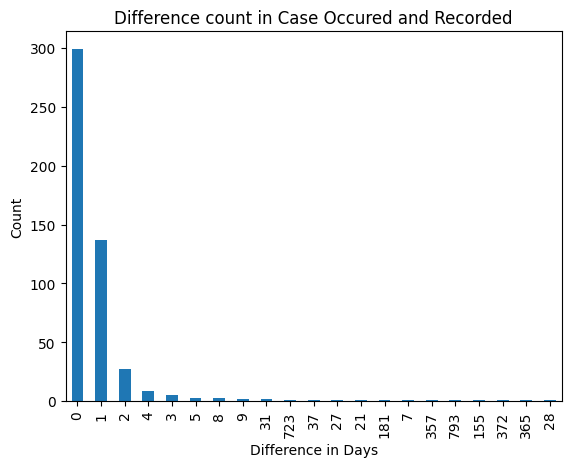

In [23]:
valuecounts=df['Difference_In_Days'].value_counts()
valuecounts.plot(kind='bar')
plt.title("Difference count in Case Occured and Recorded")
plt.xlabel("Difference in Days")
plt.ylabel("Count")
plt.show()

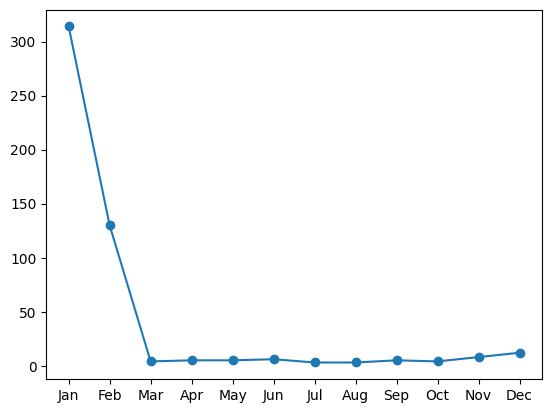

In [24]:
Months_occured=df["Month_occured"].value_counts().sort_index()
plt.plot(df["Month_occured"].value_counts().sort_index(),marker='o')
plt.xticks(Months_occured.index,labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

###  __Question 1 <br> Spatial Analysis: <br> Where are the geographical hotspots for reported crimes?__ 

In [25]:
crime_counts = crime.groupby(['LAT','LON']).size().reset_index(name='crime_count')
#print(crime_counts)
hotspots = crime_counts.sort_values(by='crime_count',ascending=False)
#print(hotspots)
top_hotspots = hotspots.head(10)
print(top_hotspots)
a=top_hotspots['LAT']
print(a)

      LAT     LON  crime_count
32  34.05 -118.26           95
33  34.05 -118.25           75
24  34.04 -118.25           47
41  34.06 -118.24           43
34  34.05 -118.24           39
23  34.04 -118.26           38
25  34.04 -118.24           24
22  34.04 -118.27           21
47  34.07 -118.23            7
42  34.06 -118.23            6
32    34.05
33    34.05
24    34.04
41    34.06
34    34.05
23    34.04
25    34.04
22    34.04
47    34.07
42    34.06
Name: LAT, dtype: float64


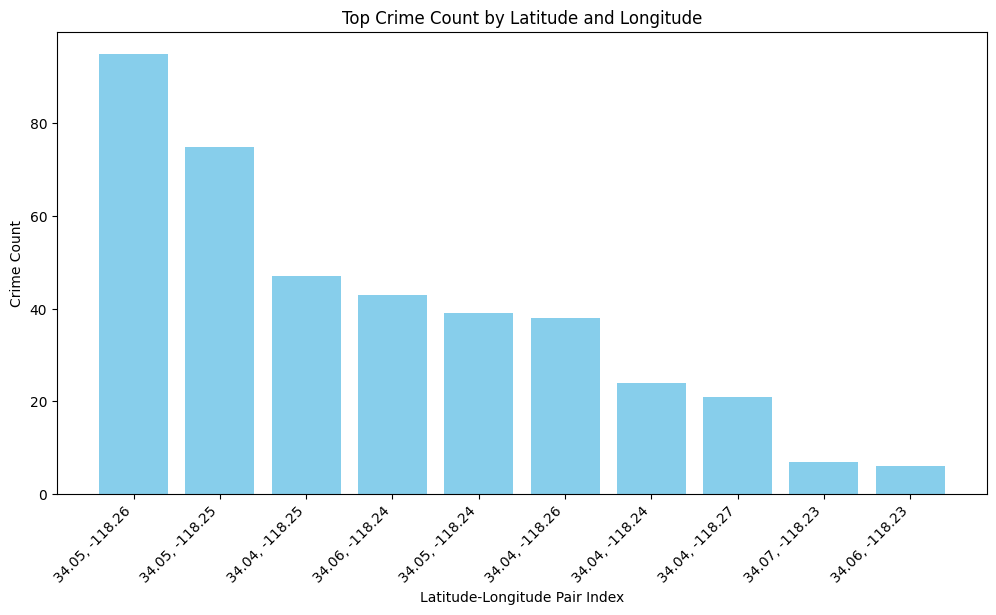

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_hotspots)), top_hotspots['crime_count'], color='skyblue')

# Adding labels and title
plt.xlabel('Latitude-Longitude Pair Index')
plt.ylabel('Crime Count')
plt.title('Top Crime Count by Latitude and Longitude')

# Setting x-tick labels as latitude-longitude pairs
plt.xticks(range(len(top_hotspots)), [f'{LAT}, {LON}' for LAT, LON in zip(top_hotspots['LAT'], top_hotspots['LON'])], rotation=45, ha='right')
plt.show()

### __Victim Demographics:__

### __1.What is the distribution of victim ages in reported crimes?__

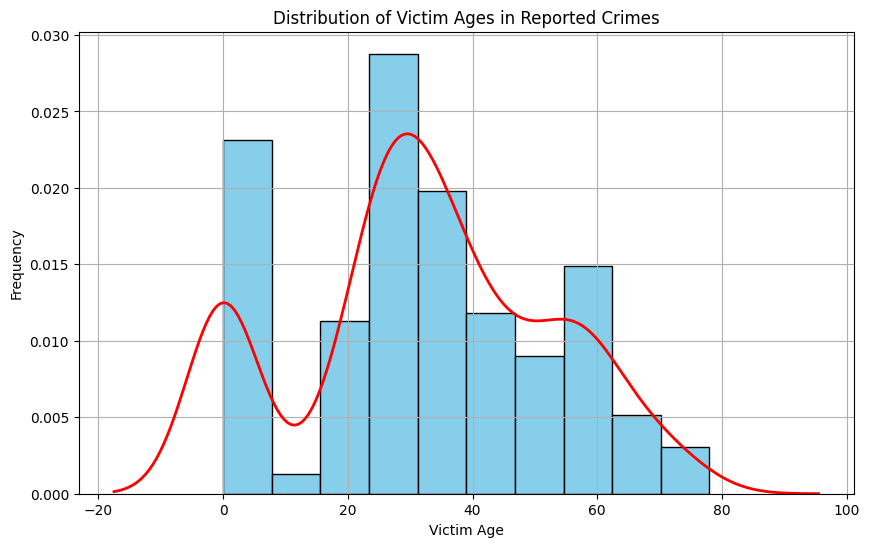

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(crime['Vict_Age'], bins=10, color='skyblue', edgecolor='black',density=True)
sns.kdeplot(crime['Vict_Age'], color='red', linestyle='-', linewidth=2)
# Adding labels and title
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages in Reported Crimes')
# Show plot
plt.grid(True)
plt.show()

In [28]:
a=round(crime['Vict_Age'].mean())
#print(a)
crime['Vict_Age']=crime['Vict_Age'].replace(0,a)
crime['Vict_Age'].isnull().sum()


0

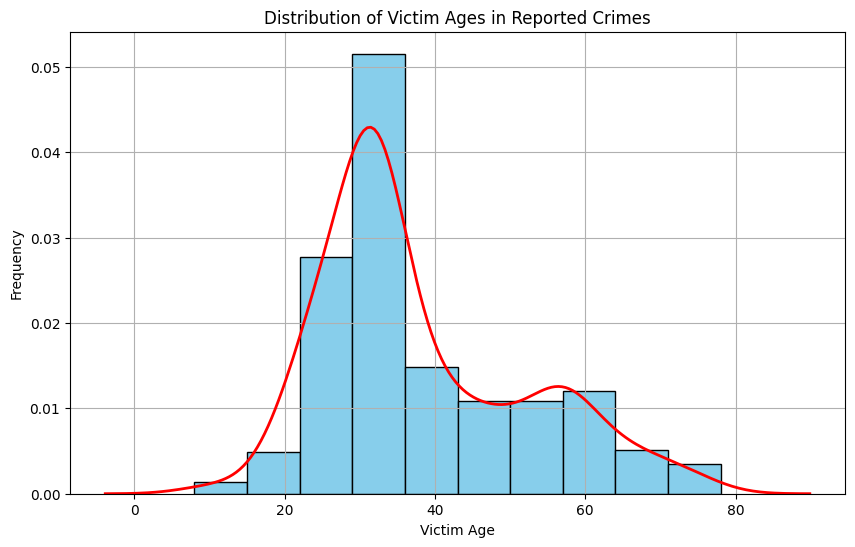

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(crime['Vict_Age'], bins=10, color='skyblue', edgecolor='black',density=True)
sns.kdeplot(crime['Vict_Age'], color='red', linestyle='-', linewidth=2)
# Adding labels and title
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages in Reported Crimes')
# Show plot
plt.grid(True)
plt.show()

### __Is there a significant difference in crime rates between male and female victims?__

In [30]:
crime_sex=crime.groupby('Vict_Sex').size().reset_index(name='crime_vict_sex')
print(crime_sex)

  Vict_Sex  crime_vict_sex
0        F             155
1        M             278
2        X              66


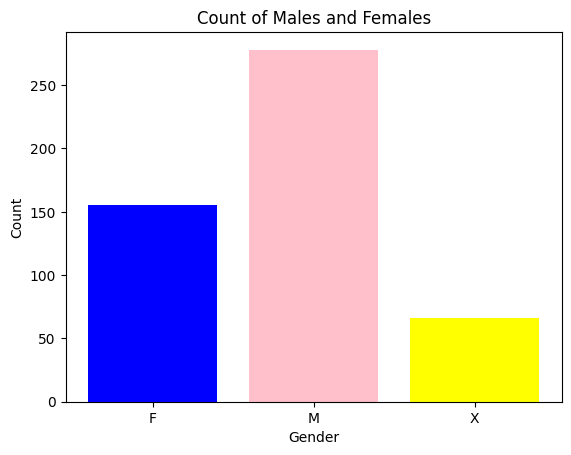

In [31]:
plt.bar(crime_sex['Vict_Sex'],crime_sex['crime_vict_sex'], color=['blue', 'pink','yellow'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Males and Females')
plt.show()

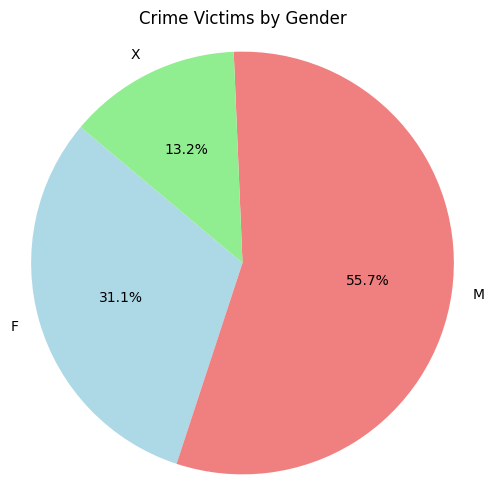

In [32]:
label=crime_sex['Vict_Sex']
value=crime_sex['crime_vict_sex']
plt.figure(figsize=(6, 6))
plt.pie(value,labels=label,autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Crime Victims by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### __Location Analysis:<br>Where do most crimes occur based on the "Location" column?__

In [33]:
df=crime.groupby('Location').size().reset_index(name='crime_count')
df_sorted = df.sort_values(by='crime_count', ascending=False)
#print(df_sorted)
to=df_sorted.head(10) 
top=to.sort_values(by='crime_count')
print(top)

               Location  crime_count
265   700 S FIGUEROA ST            4
210  500 S SAN PEDRO ST            5
241     600 S SPRING ST            5
6          100 E 5TH ST            5
286              7TH ST            5
131        300 E 5TH ST            6
30   1100 S FIGUEROA ST            6
255                 6TH            6
276        700 W 7TH ST           11
289    800 N ALAMEDA ST           14


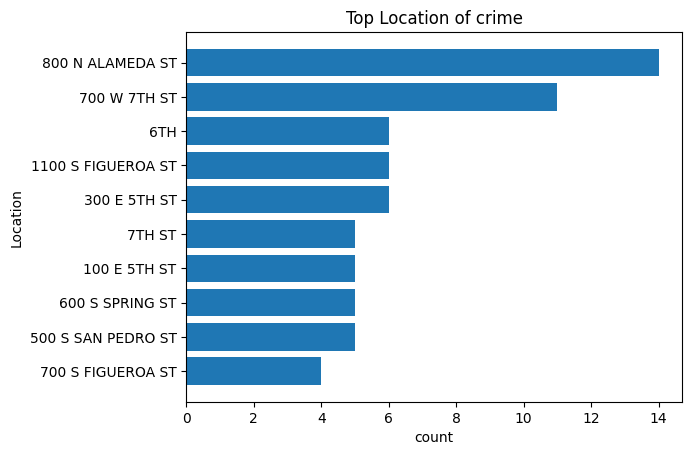

In [34]:
plt.barh(top['Location'],top['crime_count'])
plt.xlabel('count')
plt.ylabel('Location')
plt.title('Top Location of crime')
plt.show()

### __Crime Code Analysis:<br>What is the distribution of reported crimes based on Crime Code?__

In [35]:
df=crime.groupby(['Crm_Cd','Crm_Cd_Desc']).size().reset_index(name='crime_count')
print(df)
print("Total number of crime code",len(df))

    Crm_Cd                                        Crm_Cd_Desc  crime_count
0      210                                            ROBBERY           12
1      220                                  ATTEMPTED ROBBERY            4
2      230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT           24
3      310                                           BURGLARY           16
4      320                                BURGLARY, ATTEMPTED            2
5      330                              BURGLARY FROM VEHICLE           82
6      341  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...           26
7      343           SHOPLIFTING-GRAND THEFT ($950.01 & OVER)            1
8      350                                      THEFT, PERSON            9
9      351                                    PURSE SNATCHING            2
10     354                                  THEFT OF IDENTITY           10
11     420    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            9
12     421               

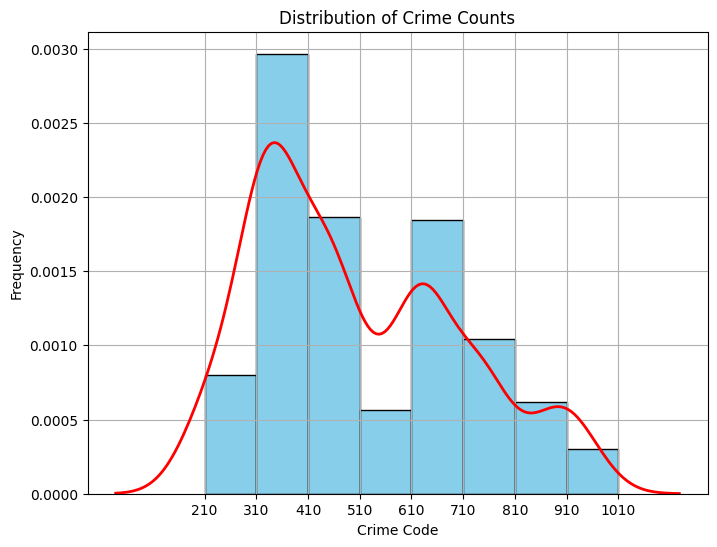

In [36]:
plt.figure(figsize=(8, 6))
bin=list(range(min(df['Crm_Cd']),max(df['Crm_Cd'])+100,100))
#print(bin)
plt.hist(crime['Crm_Cd'],bins=bin,color='skyblue',edgecolor='black',density=True)
sns.kdeplot(crime['Crm_Cd'], color='red', linestyle='-', linewidth=2)
plt.xticks(bin)
plt.xlabel('Crime Code')
plt.ylabel('Frequency')
plt.title('Distribution of Crime Counts')
plt.grid(True)
plt.show()